# Setup

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm

## Check if CUDA is avaiable

In [2]:
torch.cuda.is_available()

True

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Downloading the Dataset

In [6]:
from torchvision import datasets, transforms

mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

In [5]:
print("Number of MNIST training examples: {}".format(len(mnist_train)))
print("Number of MNIST test examples: {}".format(len(mnist_test)))

Number of MNIST training examples: 60000
Number of MNIST test examples: 10000


# Plotting a random sample from training

Default image shape: torch.Size([1, 28, 28]) 

Reshaped image shape: torch.Size([28, 28]) 

The label for this image: 8


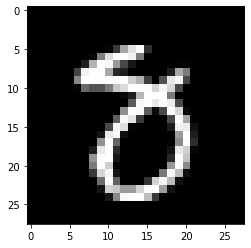

In [11]:
import random
i = random.randint(0,len(mnist_train))
image, label = mnist_train[i]

# Plot the image
print("Default image shape: {} \n".format(image.shape))
image = image.reshape([28,28])
print("Reshaped image shape: {} \n".format(image.shape))
plt.imshow(image, cmap="gray")

# Print the label
print("The label for this image: {}".format(label))

### Creating a loader

In [12]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [13]:
data_train_iter = iter(train_loader)
images, labels = data_train_iter.next()

print("Shape of the minibatch of images: {}".format(images.shape))
print("Shape of the minibatch of labels: {}".format(labels.shape))

Shape of the minibatch of images: torch.Size([100, 1, 28, 28])
Shape of the minibatch of labels: torch.Size([100])


In [14]:
x = images.view(-1, 28*28)
print("The shape of input x: {}".format(x.shape))

The shape of input x: torch.Size([100, 784])


In [15]:
# Randomly initialize weights W
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()

# Initialize bias b as 0s
b = torch.zeros(10, requires_grad=True)

In [16]:
# Linear transformation with W and b
y = torch.matmul(x, W) + b

In [17]:
print(y[0,:])

tensor([-0.2487,  0.5159, -1.0786, -0.5606, -0.5276, -0.0930, -0.2293,  0.3257,
        -0.6856, -0.2052], grad_fn=<SliceBackward>)


In [18]:
# py_eq = torch.exp(y) / torch.sum(torch.exp(y), dim=1, keepdim=True)

#Softmax to probabilities with torch.nn.functional
import torch.nn.functional as F
py = F.softmax(y, dim=1)
print("py[0] with torch.nn.functional.softmax: {}".format(py[0]))

py[0] from equation: tensor([0.0932, 0.2002, 0.0407, 0.0682, 0.0705, 0.1089, 0.0950, 0.1656, 0.0602,
        0.0974], grad_fn=<SelectBackward>)
py[0] with torch.nn.functional.softmax: tensor([0.0932, 0.2002, 0.0407, 0.0682, 0.0705, 0.1089, 0.0950, 0.1656, 0.0602,
        0.0974], grad_fn=<SelectBackward>)


In [19]:
#cross_entropy_eq = torch.mean(-torch.log(py_eq)[range(labels.shape[0]),labels])

# Cross-entropy loss with torch.nn.functional
cross_entropy = F.cross_entropy(y, labels)
print("cross entropy with torch.nn.functional.cross_entropy: {}".format(cross_entropy))

cross entropy with torch.nn.functional.cross_entropy: 2.4003756046295166


In [20]:
# Optimizer
optimizer = torch.optim.SGD([W,b], lr=0.1)

In [21]:
cross_entropy.backward()

In [22]:
b.grad

tensor([-0.0183,  0.0809, -0.0477, -0.0233, -0.0541,  0.0141,  0.0184, -0.0115,
         0.0211,  0.0202])

In [23]:
optimizer.step()

In [24]:
b

tensor([ 0.0018, -0.0081,  0.0048,  0.0023,  0.0054, -0.0014, -0.0018,  0.0012,
        -0.0021, -0.0020], requires_grad=True)

In [25]:
print("b.grad before zero_grad(): {}".format(b.grad))
optimizer.zero_grad()
print("b.grad after zero_grad(): {}".format(b.grad))

b.grad before zero_grad(): tensor([-0.0183,  0.0809, -0.0477, -0.0233, -0.0541,  0.0141,  0.0184, -0.0115,
         0.0211,  0.0202])
b.grad after zero_grad(): tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


# Training

In [26]:
# Iterate through train set minibatchs 
for images, labels in tqdm(train_loader):
    # Zero out the gradients
    optimizer.zero_grad()
    
    # Forward pass
    x = images.view(-1, 28*28)
    y = torch.matmul(x, W) + b
    cross_entropy = F.cross_entropy(y, labels)
    # Backward pass
    cross_entropy.backward()
    optimizer.step()

  0%|          | 0/600 [00:00<?, ?it/s]

# Testing

In [27]:
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images.view(-1, 28*28)
        y = torch.matmul(x, W) + b
        
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())
    
print('Test accuracy: {}'.format(correct/total))

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.902400016784668
